<a href="https://colab.research.google.com/github/Felizlin94/ml-titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專題實作 #01:鐵達尼號存活預測

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



 Name :
 Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

 Sex :
 Sex
male      577
female    314
Name: count, dtype: int64

 Ticket :
 Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

 Cabin :
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54     

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


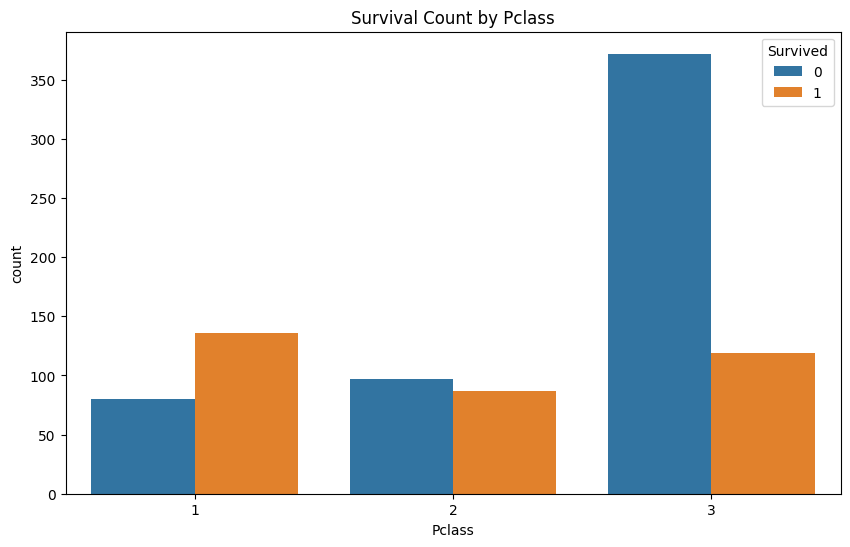

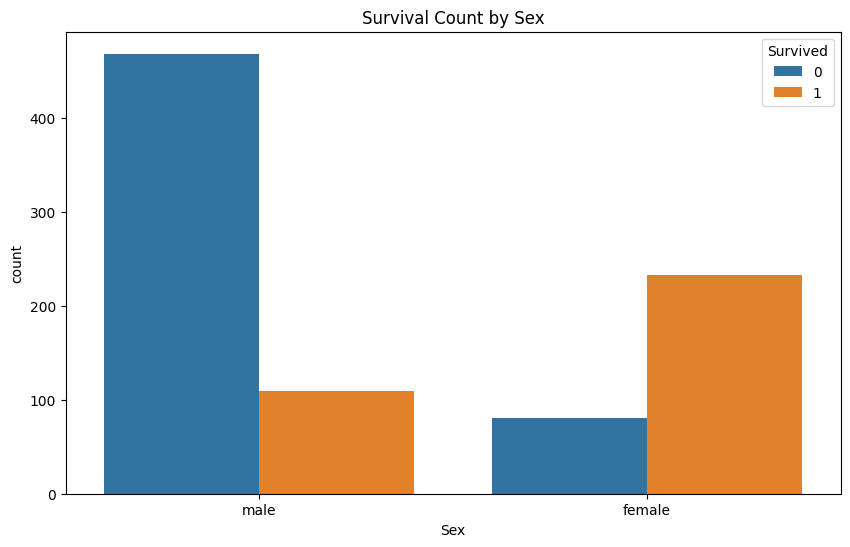

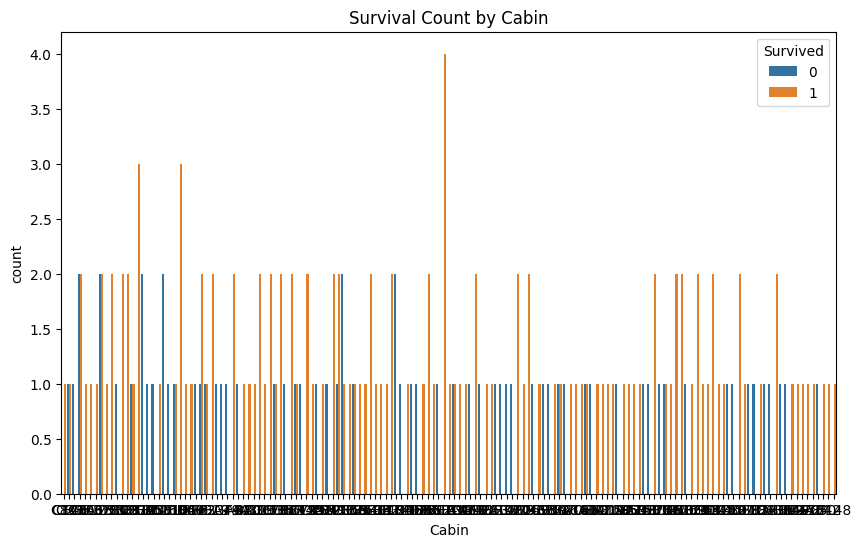

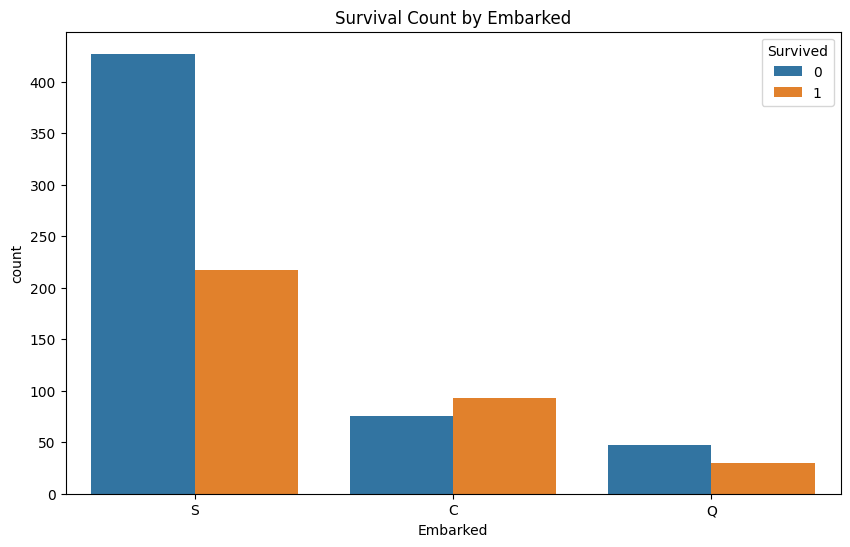

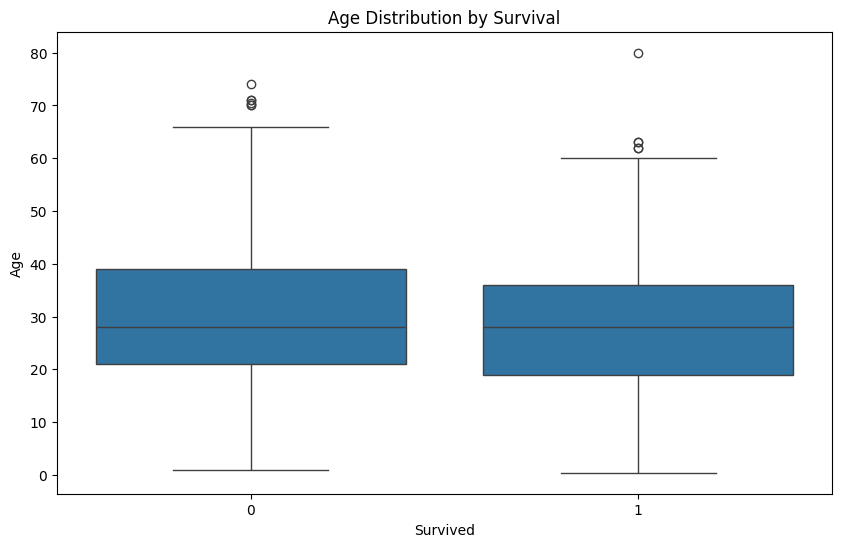

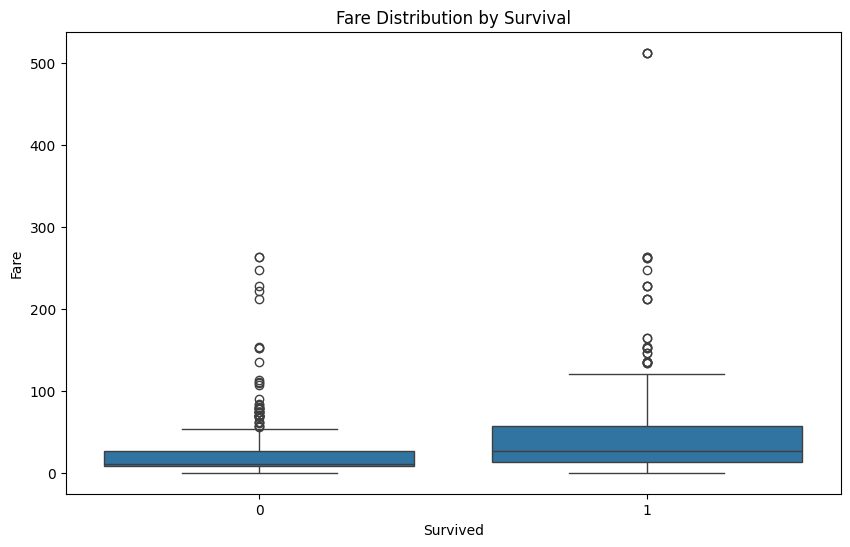

ValueError: Could not interpret value `FamilySize` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from sklearn.ensemble import RandomForestClassifier


# Load the `train.csv` dataset of the Titanic dataset
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)

# Definition of each column in Titanic data: (https://www.kaggle.com/competitions/titanic/data)

# Check the number of rows and columns, the count of non-null values for each column, and the data type of each column
display(HTML("<h3>Info df:</h3>"))
print(df.info())

# Look for missing values in the dataset
missing_values = df.isnull().sum()
display(HTML("<h3>Missing values:</h3>"))
print(missing_values)

# Check the distribution of categorical variables
display(HTML("<h3>The distribution of categorical variables:</h3>"))
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print("\n", column, ":\n", df[column].value_counts())

# Statistical summary of numerical columns
display(HTML("<h3>Statistical Summary of numerical columns:</h3>"))
print(df.describe())

# Clip the first English character of the Cabin value as a new categorical feature

# Create Family-Size as a new numerical feature

### Visualization
# Visualize the relationship between categorical columns and Survived
categorical_columns = ['Pclass', 'Sex', 'Cabin', 'Embarked']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Survived', data=df)
    plt.title(f'Survival Count by {column}')
    plt.show()

# Visualize the relationship between numerical columns and Survived
numerical_columns = ['Age', 'Fare', 'FamilySize']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Survived', y=column, data=df)
    plt.title(f'{column} Distribution by Survival')
    plt.show()

# Violin plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Survived', y=column, data=df)
    plt.title(f'{column} Distribution by Survival')
    plt.show()


